# ABOUT DATASET
- Brand : Indicates the brand of the product.
- Color : Indicates the color of the product.
- Size : Indicates the size or dimension of the product.
- Price : It refers to the price at which the product is normally offered for sale.
- Offer_price : It refers to the discounted sales price of the product.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [4]:
df = pd.read_csv("data.csv") 
df

,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118
...,...,...,...,...,...
5674,Toms,Red & White,4,6747,5098
5675,Crocs,Black,7,2942,2868
5676,Toms,Blue,9,4847,3673
5677,Liberty,Black,6,2146,1722


In [5]:
df1 = df.copy()     # We took a copy of our original data because we will be working on it.

In [6]:
df.info() 

# The `df.info()` method provides a quick overview of a pandas DataFrame’s structure, displaying data types, null values, 
# and memory usage for each column, which is crucial for understanding the dataset before analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        5679 non-null   object
 1   color        5679 non-null   object
 2   size         5679 non-null   object
 3   price        5679 non-null   int64 
 4   offer_price  5679 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 222.0+ KB


In [7]:
df.describe().T 

# This method provides a transposed summary of the descriptive statistics for a pandas DataFrame, including count, mean, standard deviation, 
# min, 25th percentile, median, 75th percentile, and max for numerical columns.

,count,mean,std,min,25%,50%,75%,max
price,5679.0,4945.126255,5344.881308,1346.0,2942.0,3742.0,4646.0,37947.0
offer_price,5679.0,4007.745026,4761.543884,773.0,1968.0,2868.0,4048.0,34123.0


In [8]:
df.isnull().sum()

brand          0
color          0
size           0
price          0
offer_price    0
dtype: int64

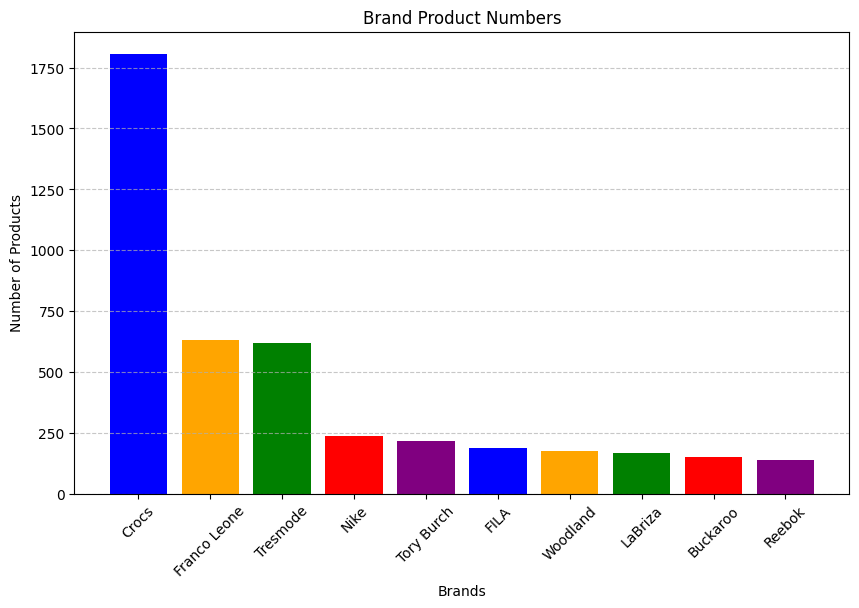

In [9]:
brand_counts = df['brand'].value_counts().head(10)  
brands = brand_counts.index 
counts = brand_counts.values  

# Bar grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.bar(brands, counts, color=['blue', 'orange', 'green', 'red', 'purple'][:len(brands)])  # Renkleri sınırlı sayıda eşle
plt.title('Brand Product Numbers')
plt.xlabel('Brands')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.xticks(rotation=45)
plt.show()

#### ➤ We looked at the first 10 brands with the most products in the dataset. Crocs has a significantly higher number of products compared to the others. Franco Leone and Tresmode are quite close in terms of product count, while the other brands have fewer than 250 products each.

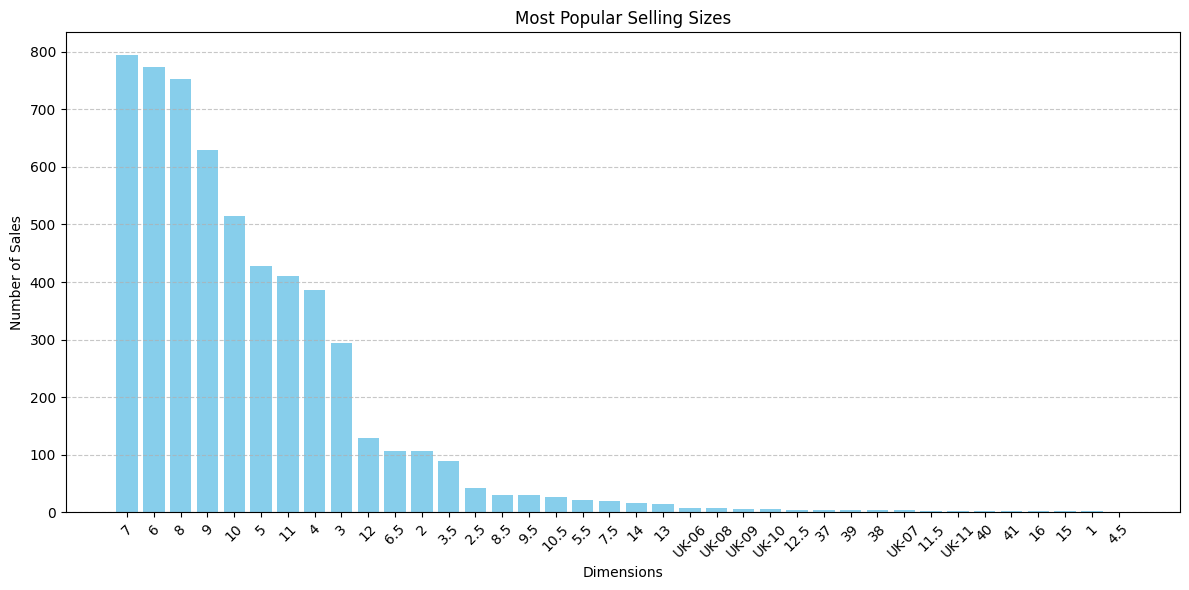

In [10]:
size_counts = df['size'].value_counts()
sizes = size_counts.index  
counts = size_counts.values  

plt.figure(figsize=(12, 6))
plt.bar(sizes, counts, color='skyblue')
plt.title('Most Popular Selling Sizes')
plt.xlabel('Dimensions')
plt.ylabel('Number of Sales')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.tight_layout()  
plt.show()

### ➤ The most commonly sold sizes are 7, 6, 8, and 9. It is observed that sales numbers gradually decrease for the other sizes.

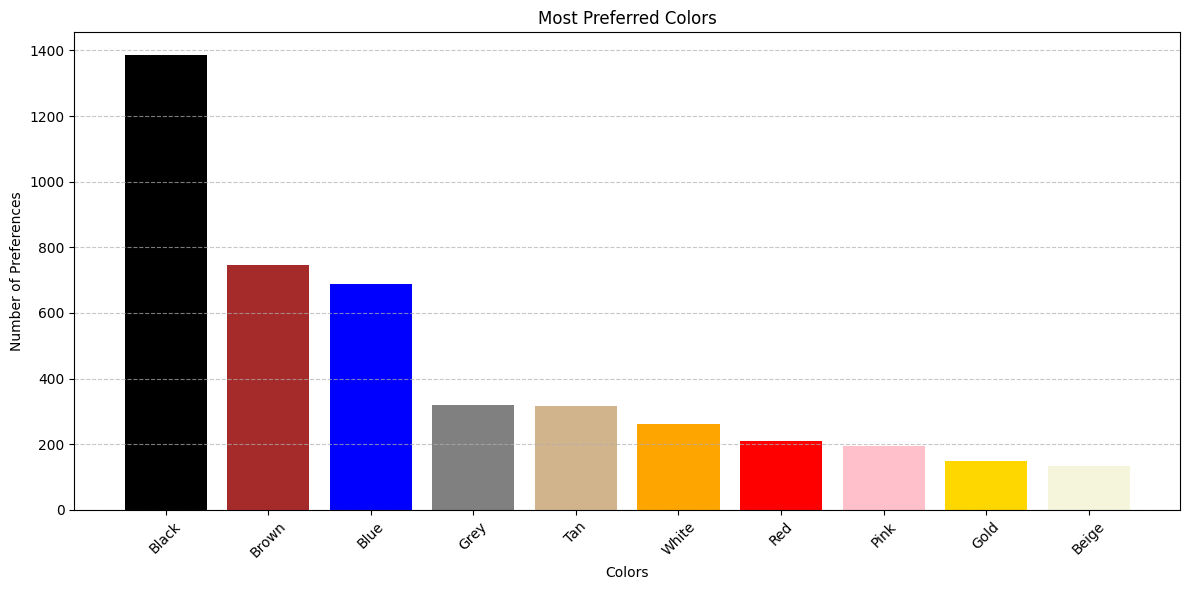

In [11]:
color_counts = df['color'].value_counts().head(10)
colors = color_counts.index  
counts = color_counts.values  


plt.figure(figsize=(12, 6))
plt.bar(colors, counts, color=['black', 'brown', 'blue', 'grey', 'tan', 'orange','red', 'pink','gold','beige'])
plt.title('Most Preferred Colors')
plt.xlabel('Colors')
plt.ylabel('Number of Preferences')


plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()

### ➤  Black is by far the most preferred color. Following it are brown and blue. The other colors have fewer than 250 instances in the dataset.

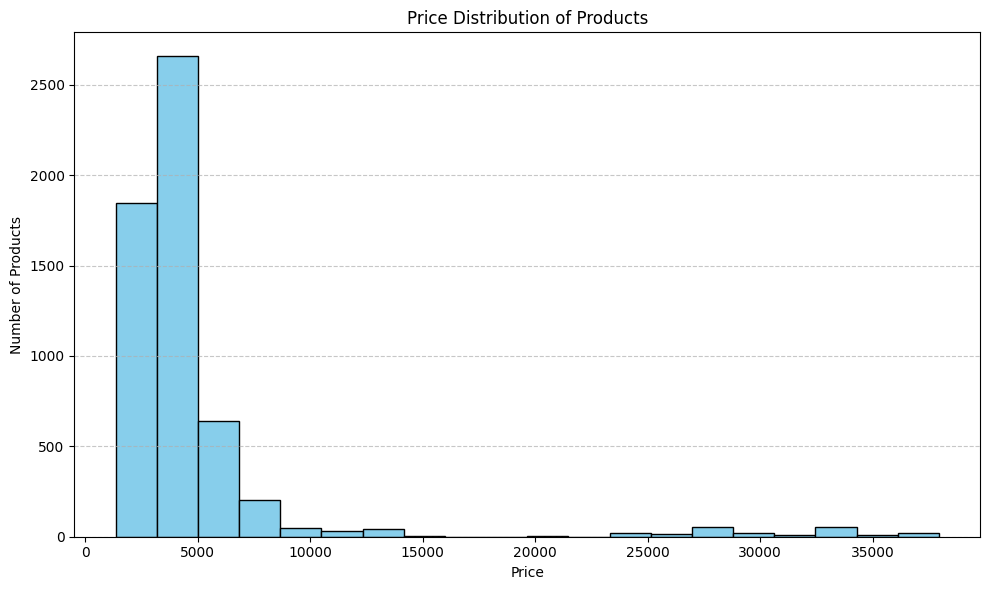

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()

### ➤ The most sold products are priced between 2000 and 500. After this range, there is a significant drop in sales. Products priced at 5000 sell an average of around 2700 units, while the product with the highest price, 35,000, has sold just over 10 units.

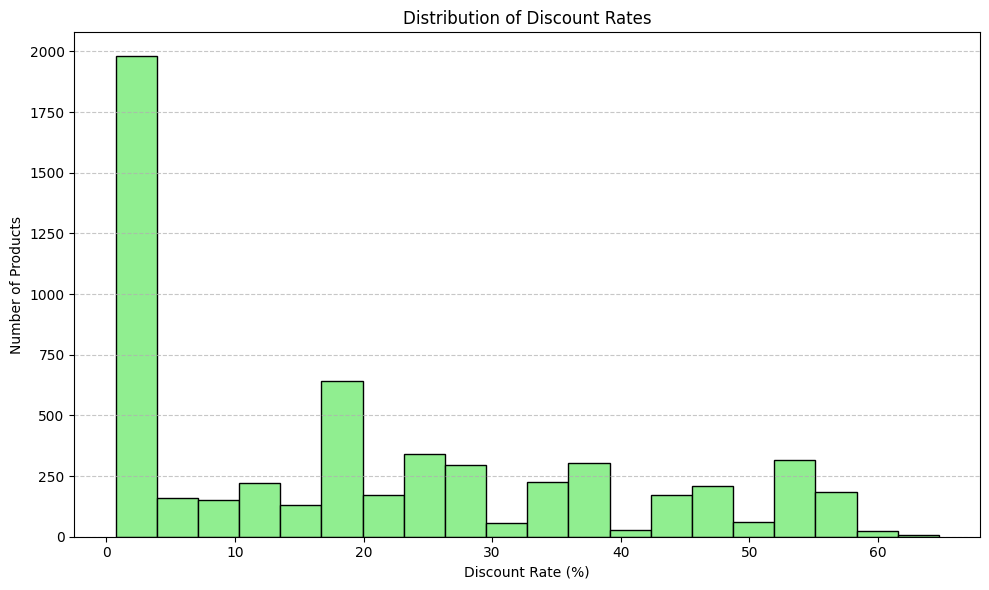

In [13]:
df['discount_percentage'] = ((df['price'] - df['offer_price']) / df['price']) * 100

plt.figure(figsize=(10, 6))
plt.hist(df['discount_percentage'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Discount Rates')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()

### ➤ The number of products with a 5% discount is 85% higher compared to the others. Products with a 20% discount are also higher than the other discount rates.

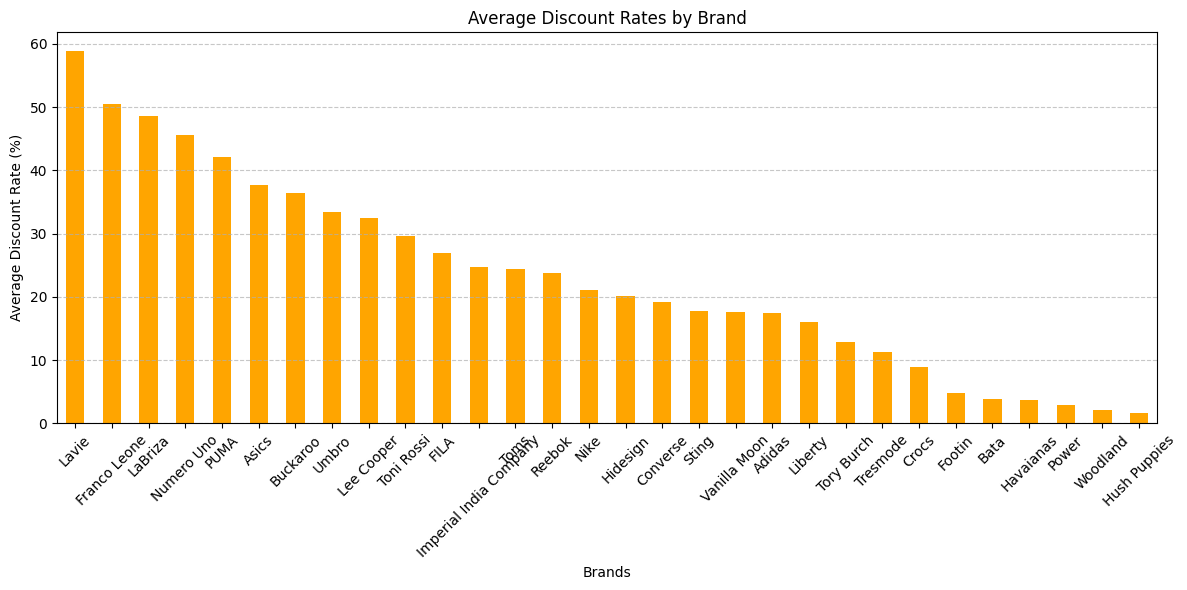

In [14]:
brand_discount_mean = df.groupby('brand')['discount_percentage'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
brand_discount_mean.plot(kind='bar', color='orange')
plt.title('Average Discount Rates by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Discount Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()

### ➤ The brand that offers the most discounts is Lavie. Following it are Franco Leone, LaBriza, and Numero Uno. The brand with the least discounts is Hush Puppies.

## This work is a team effort. Participants;
- https://www.kaggle.com/zeripek
- https://www.kaggle.com/abdullahkse